<a href="https://colab.research.google.com/github/engineerinvestor/sports-analytics/blob/main/NFL_Analytics_Tutorial_Should_You_Go_for_Two_When_Down_by_8_Points_Late_in_the_Game%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL Analytics Tutorial: Should You Go for Two When Down by 8 Points Late in the Game?

Name: Engineer Investor [@egr_investor](https://twitter.com/egr_investor)

Date: 11/03/2024

## Introduction

In this tutorial, we'll explore a critical decision in NFL games: whether a team down by 8 points after scoring a touchdown with 90 seconds remaining should attempt a two-point conversion or kick the extra point. We'll use Python to model the probabilities associated with each strategy and determine which approach maximizes the team's chances of winning.

---

## Key Assumptions

Before diving into the analysis, let's establish some key probabilities based on NFL statistics:

- **Extra Point Success Rate $( p_{\text{EP}} ) $** : 99% or 0.99
- **Two-Point Conversion Success Rate $( p_{\text{2PC}} )$** : 50% or 0.50
- **Chance of Winning in Overtime $( p_{\text{OT}} )$** : 50% or 0.50
- **Probability of Scoring Another Touchdown $( p_{\text{TD}} )$** : We'll vary this from 0.1 to 1.0 to see how it affects the outcomes.

---

## Import Necessary Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

## Define Key Probabilities

In [3]:
# Set probabilities
p_EP = 0.99     # Extra point success rate
p_2PC = 0.50    # Two-point conversion success rate
p_OT = 0.50     # Chance of winning in overtime


---

## Strategy 1: Go for Two After the First Touchdown

### Scenario 1: First Two-Point Conversion Succeeds

- **Probability**: $( p_{\text{2PC}} )$
- **Outcome**: Team is now down by 6 points.
- **Next Steps**:
  - Score another touchdown $( p_{\text{TD}} )$.
  - Kick the extra point to win $( p_{\text{EP}} )$.
  - If the extra point fails, the game goes to overtime.

### Scenario 2: First Two-Point Conversion Fails

- **Probability**: $( 1 - p_{\text{2PC}} )$
- **Outcome**: Team remains down by 8 points.
- **Next Steps**:
  - Score another touchdown $( p_{\text{TD}} )$.
  - Attempt a second two-point conversion to tie the game.
  - If successful, the game goes to overtime.

---

## Strategy 2: Kick Extra Point After the First Touchdown

### Scenario 1: First Extra Point Succeeds

- **Probability**: $( p_{\text{EP}} )$
- **Outcome**: Team is now down by 7 points.
- **Next Steps**:
  - Score another touchdown $( p_{\text{TD}} )$.
  - Kick the extra point to tie and go to overtime.

### Scenario 2: First Extra Point Fails

- **Probability**: $( 1 - p_{\text{EP}} )$
- **Outcome**: Team remains down by 8 points.
- **Next Steps**:
  - Score another touchdown $( p_{\text{TD}} )$.
  - Attempt a two-point conversion to tie the game.
  - If successful, the game goes to overtime.

---

## Calculating Probabilities with Python

We'll compute the total probability of winning under each strategy for varying values of $( p_{\text{TD}} )$.

In [4]:
# Define a range of p_TD values from 0.1 to 1.0
p_TD_values = np.linspace(0.1, 1.0, 10)

# Initialize lists to store probabilities
strategy1_wins = []
strategy2_wins = []

---

### Calculate Probabilities for Each Strategy

In [5]:
for p_TD in p_TD_values:
    # Strategy 1 Calculations
    # Scenario 1: First two-point conversion succeeds
    prob_win_S1 = p_2PC * p_TD * p_EP  # Win outright
    prob_OT_S1 = p_2PC * p_TD * (1 - p_EP) * p_OT  # Overtime if extra point fails

    # Scenario 2: First two-point conversion fails
    prob_OT_S2 = (1 - p_2PC) * p_TD * p_2PC * p_OT  # Overtime if second two-point conversion succeeds

    # Total probability of winning for Strategy 1
    total_prob_win_S1 = prob_win_S1 + (prob_OT_S1 + prob_OT_S2)

    # Strategy 2 Calculations
    # Scenario 1: First extra point succeeds
    prob_OT_S3 = p_EP * p_TD * p_EP * p_OT  # Overtime after second extra point

    # Scenario 2: First extra point fails
    prob_OT_S4 = (1 - p_EP) * p_TD * p_2PC * p_OT  # Overtime if two-point conversion succeeds

    # Total probability of winning for Strategy 2
    total_prob_win_S2 = prob_OT_S3 + prob_OT_S4

    # Append to lists
    strategy1_wins.append(total_prob_win_S1)
    strategy2_wins.append(total_prob_win_S2)



---

## Comparing the Strategies

### Plotting the Probabilities

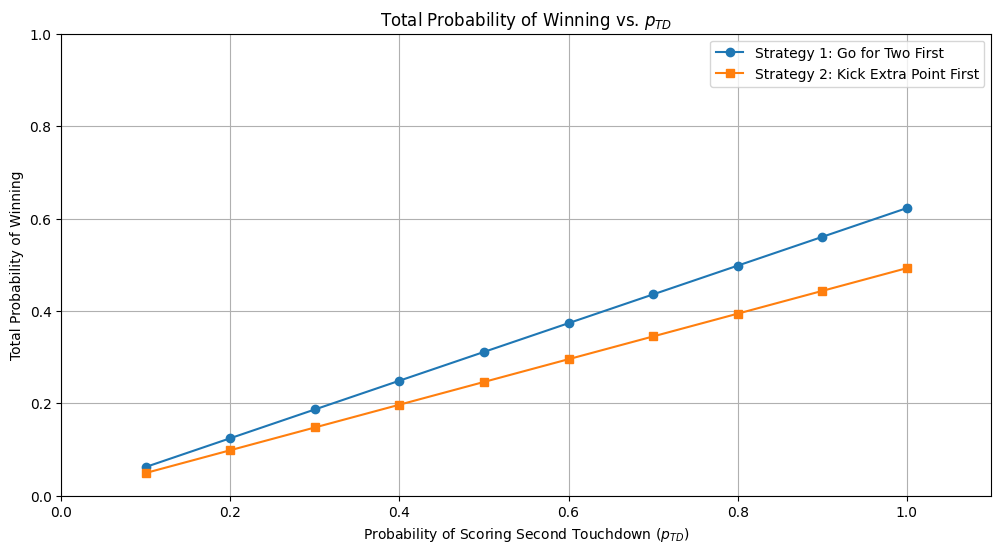

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(p_TD_values, strategy1_wins, label='Strategy 1: Go for Two First', marker='o')
plt.plot(p_TD_values, strategy2_wins, label='Strategy 2: Kick Extra Point First', marker='s')
plt.xlabel('Probability of Scoring Second Touchdown ($p_{TD}$)')
plt.ylabel('Total Probability of Winning')
plt.title('Total Probability of Winning vs. $p_{TD}$')
plt.legend()
plt.xlim(0.0, 1.1)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.show()

### Interpretation of the Plot

- **Strategy 1** consistently offers a higher probability of winning across all values of $( p_{\text{TD}} )$.
- The advantage of Strategy 1 becomes more significant as the probability of scoring the second touchdown increases.

---

## Detailed Analysis at $( p_{\text{TD}} = 1.0 )$

Assuming the team is certain to score the second touchdown:

In [7]:
p_TD = 1.0  # Certainty of scoring the second touchdown

# Strategy 1
prob_win_S1 = p_2PC * p_TD * p_EP  # Win outright
prob_OT_S1 = p_2PC * p_TD * (1 - p_EP) * p_OT  # Overtime if extra point fails
prob_OT_S2 = (1 - p_2PC) * p_TD * p_2PC * p_OT  # Overtime if second two-point conversion succeeds
total_prob_win_S1 = prob_win_S1 + (prob_OT_S1 + prob_OT_S2)

# Strategy 2
prob_OT_S3 = p_EP * p_TD * p_EP * p_OT  # Overtime after second extra point
prob_OT_S4 = (1 - p_EP) * p_TD * p_2PC * p_OT  # Overtime if two-point conversion succeeds
total_prob_win_S2 = prob_OT_S3 + prob_OT_S4

# Display Results
print("Strategy 1: Go for Two After First Touchdown")
print(f"Total Probability of Winning: {total_prob_win_S1:.4f}")

print("\nStrategy 2: Kick Extra Point After First Touchdown")
print(f"Total Probability of Winning: {total_prob_win_S2:.4f}")

Strategy 1: Go for Two After First Touchdown
Total Probability of Winning: 0.6225

Strategy 2: Kick Extra Point After First Touchdown
Total Probability of Winning: 0.4925




**Output**:

```
Strategy 1: Go for Two After First Touchdown
Total Probability of Winning: 0.6225

Strategy 2: Kick Extra Point After First Touchdown
Total Probability of Winning: 0.4925
```

---

## Conclusion

Our analysis demonstrates that **going for a two-point conversion after the first touchdown increases the team's overall probability of winning** compared to kicking the extra point.

**Key Insights**:

- **Strategy 1** provides clarity on the required outcomes for the remainder of the game.
- The team can adjust their gameplay based on the result of the first two-point conversion.
- Even if the first two-point attempt fails, there's still a path to tie the game.

---

## Factors to Consider

While the mathematical analysis favors Strategy 1, real-world considerations may affect the decision:

- **Team's Two-Point Conversion Success Rate**: If a team has a higher or lower success rate than the league average, it may influence the strategy.
- **Opposing Defense Strength**: The likelihood of successful conversions may be affected by the opponent's defensive capabilities.
- **Game Context**: Player injuries, weather conditions, and momentum can impact decision-making.

---

## Further Exploration

You can adjust the key probabilities to reflect different scenarios:

- **Adjust $( p_{\text{2PC}} )$** : Change the two-point conversion success rate to see its impact.
- **Adjust $( p_{\text{EP}} )$** : Although extra points are almost automatic, slight changes can be explored.
- **Simulate Overtime Win Probability $( p_{\text{OT}} )$** : If one team is stronger, the chance of winning in overtime may not be 50%.

---

## Conclusion

In high-stakes situations, making data-driven decisions can significantly impact the outcome of the game. This analysis supports the strategy of going for two when down by 8 points late in the game to maximize the chances of winning.

---

## References

- [NFL Two-Point Conversion Statistics](https://www.pro-football-reference.com/)
- [Decision-Making in NFL Games](https://www.espn.com/nfl/story/_/id/21596764/the-math-going-two-point-conversions)

---

*This tutorial demonstrates how to apply probability theory and Python programming to real-world sports analytics, providing insights that can inform strategic decisions in NFL games.*